In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
all_data=pd.read_csv("full_data.csv")

In [3]:
all_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Other,26.00,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
1,Male,34.00,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0
2,Male,61.00,0,0,Yes,Govt_job,Urban,184.15,NaN,Unknown,0
3,Male,54.00,1,0,Yes,Private,Rural,198.69,NaN,smokes,0
4,Male,40.00,0,0,Yes,Private,Rural,89.77,NaN,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
5185,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown,0
5186,Female,8.00,0,0,No,children,Urban,106.51,12.3,Unknown,0
5187,Female,4.00,0,0,No,children,Urban,107.25,12.0,Unknown,0
5188,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0


In [4]:
all_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
imputer = SimpleImputer(strategy='mean')
all_data['bmi'] = imputer.fit_transform(all_data[['bmi']])

In [7]:
all_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
target = 'stroke'
X = all_data.loc[:,all_data.columns!=target]
y = all_data.loc[:,all_data.columns==target]

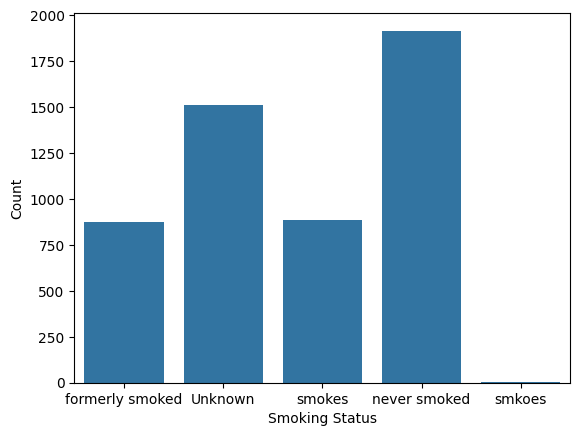

In [9]:
sns.countplot(x='smoking_status', data=all_data)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

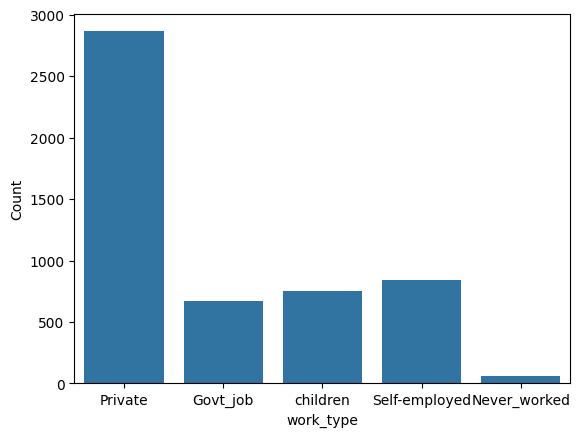

In [10]:
sns.countplot(x='work_type', data=all_data)
plt.xlabel('work_type')
plt.ylabel('Count')
plt.show()

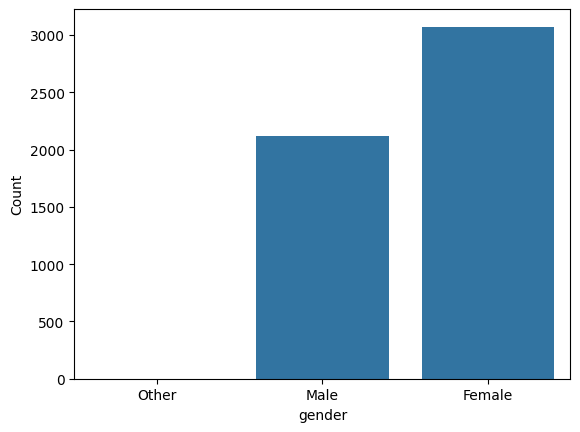

In [11]:
sns.countplot(x='gender', data=all_data)
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [12]:
X = pd.get_dummies(X)

stroke
0    4704
1     486
Name: count, dtype: int64


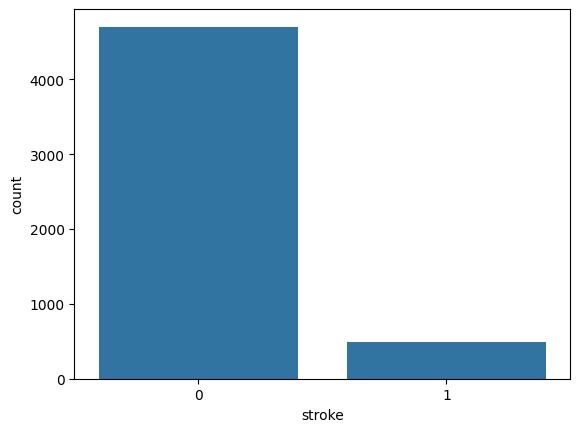

In [13]:
ax = sns.countplot(x=target,data=all_data)
print(all_data[target].value_counts())

In [14]:
percentage_no_stroke = (4900/float(all_data.shape[0]))*100
print(percentage_no_stroke)

94.41233140655106


In [15]:
percentage_yes_stroke = 100*(462/float(all_data.shape[0]))
print(percentage_yes_stroke)

8.901734104046243


In [16]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

stroke
0    4704
1    4704
Name: count, dtype: int64


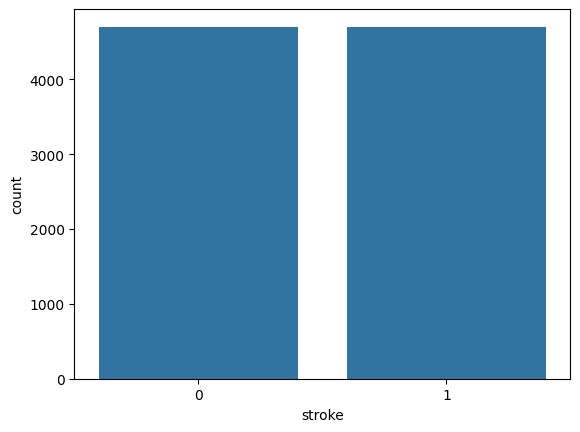

In [17]:
ay = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,y, test_size=0.10, shuffle=True)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [22]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 250, 500]})

In [23]:
best_params = grid_search.best_params_

In [24]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [25]:
best_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500
)

In [26]:
 random_forest_en=best_rf_model.fit(X_train, Y_train.values.ravel())

In [27]:
y_pred = best_rf_model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       500
           1       1.00      0.95      0.97       441

    accuracy                           0.97       941
   macro avg       0.98      0.97      0.97       941
weighted avg       0.97      0.97      0.97       941



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.973432518597237
Precision: 0.9952380952380953
Recall: 0.9478458049886621
F1 Score: 0.9709639953542393


In [30]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import metrics
#clf = DecisionTreeClassifier()
#clf = clf.fit(X_train,Y_train)
#making prediction on test set
#y_pred = clf.predict(X_test)
# Model Accuracy
#print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


In [31]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(X_train, Y_train.values.ravel())
#y_pred = rf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

In [32]:
#def rf(X_train, Y_train, n_estimators=300, max_depth=None):
# rndforest = RandomForestClassifier(n_estimators=n_estimators, n_jobs=-1)
 #rndforest.fit(X_train, Y_train)
 #return rndforest

In [33]:
#random_forest_en = rf(X_train,Y_train.values.ravel(), n_estimators=300, max_depth=None)


In [34]:
#printing the accuracy
#print("TRAINING ACCURACY:", random_forest_en.score(X_train, Y_train))
#print("VALIDATION ACCURACY", random_forest_en.score(X_test, Y_test))

In [35]:
#saving the model
import pickle

# Save the trained model
with open('deploy.pkl', 'wb') as model_file:
     pickle.dump(best_rf_model, model_file)


In [36]:
with open('deploy.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [37]:
all_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Other,26.0,0,0,No,Private,Rural,143.33,22.400000,formerly smoked,0
1,Male,34.0,0,1,Yes,Private,Urban,106.23,28.528262,formerly smoked,0
2,Male,61.0,0,0,Yes,Govt_job,Urban,184.15,28.528262,Unknown,0
3,Male,54.0,1,0,Yes,Private,Rural,198.69,28.528262,smokes,0
4,Male,40.0,0,0,Yes,Private,Rural,89.77,28.528262,smokes,0


In [38]:
print(X.columns)




Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smkoes',
       'smoking_status_smokes'],
      dtype='object')


In [39]:
#input_data = pd.DataFrame([[79, 1, 0, 80.43, 29.7, 1, 0, 0,0,1 , 0, 0,1,0 , 0, 1, 0, 0, 0, 1, 0]],
                           #columns=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                       # 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
                      # 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
                     #'work_type_Private', 'work_type_Self-employed', 'work_type_children',
                      # 'Residence_type_Rural', 'Residence_type_Urban',
                       # 'smoking_status_Unknown', 'smoking_status_formerly smoked',
                        #'smoking_status_never smoked', 'smoking_status_smokes'])

In [40]:
#model.predict(input_data)

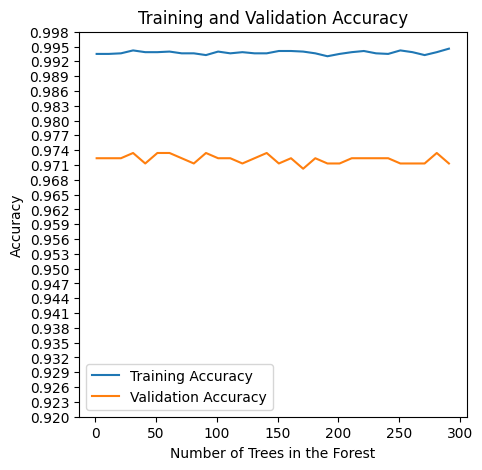

In [41]:
#plotting the verification and validation curve
train_scores = []
test_scores = []
tree_range = np.arange(1, 301, 10)

for trees in tree_range:
    model = best_rf_model.fit(X_train, Y_train.values.ravel())
    train_scores.append(model.score(X_train, Y_train))
    test_scores.append(model.score(X_test, Y_test))

# Plotting the training curve
plt.figure(figsize=(5, 5))
plt.plot(tree_range, train_scores, label='Training Accuracy')
plt.plot(tree_range, test_scores, label='Validation Accuracy')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.yticks(np.arange(0.92, 1, 0.003))
plt.savefig("accuracy.jpg")
plt.show()

In [42]:
min_values = X_train.min()
max_values = X_train.max()
print("Min Values:", min_values)
print("Max Values:", max_values)

Min Values: age                                0.08
hypertension                          0
heart_disease                         0
avg_glucose_level                 55.12
bmi                                10.3
gender_Female                     False
gender_Male                       False
gender_Other                      False
ever_married_No                   False
ever_married_Yes                  False
work_type_Govt_job                False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
Residence_type_Rural              False
Residence_type_Urban              False
smoking_status_Unknown            False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smkoes             False
smoking_status_smokes             False
dtype: object
Max Values: age                                82.0
hypertension                          1
he

In [43]:
feature_importances = random_forest_en.feature_importances_
feature_names = X.columns


Feature Importance Scores:
                           Feature  Importance
3                avg_glucose_level    0.227625
0                              age    0.158821
4                              bmi    0.093314
2                    heart_disease    0.053968
21           smoking_status_smokes    0.043715
1                     hypertension    0.041764
16            Residence_type_Urban    0.040412
15            Residence_type_Rural    0.035662
5                    gender_Female    0.035130
6                      gender_Male    0.035022
19     smoking_status_never smoked    0.032060
12               work_type_Private    0.031532
18  smoking_status_formerly smoked    0.030927
13         work_type_Self-employed    0.029545
17          smoking_status_Unknown    0.025136
8                  ever_married_No    0.023753
9                 ever_married_Yes    0.019915
10              work_type_Govt_job    0.017614
14              work_type_children    0.013275
11          work_type_Never_work

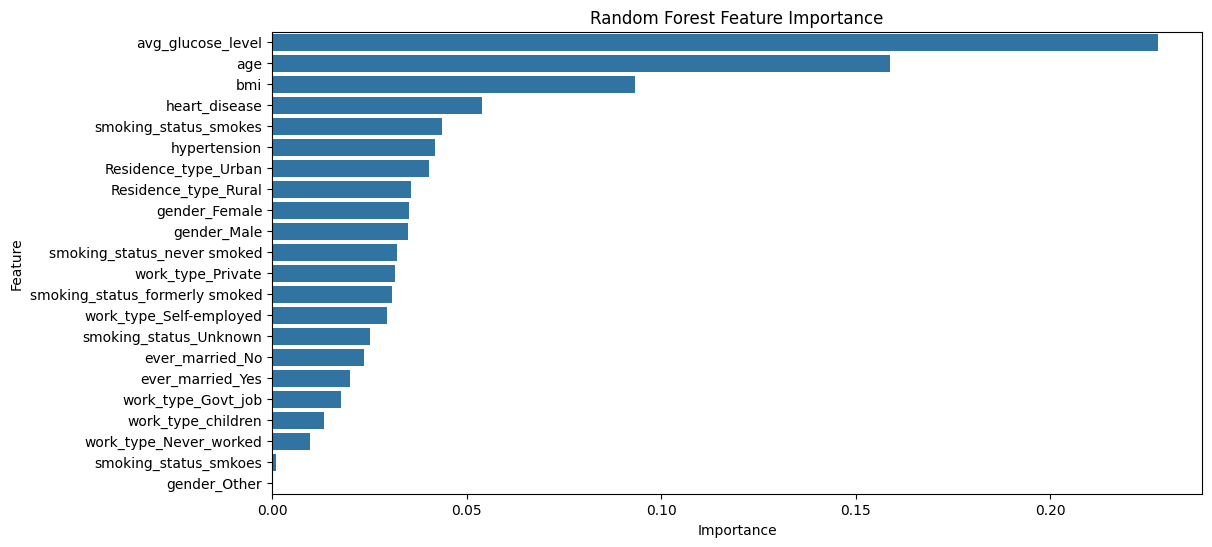

In [44]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("\nFeature Importance Scores:")
print(feature_importance_df)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

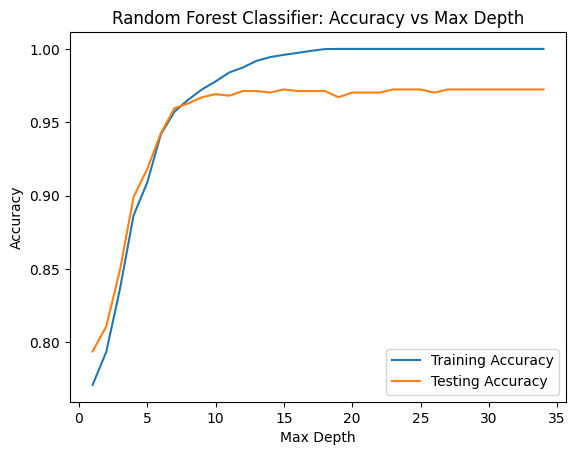

Accuracy: 0.9723698193411264


In [45]:
train_score = []
test_score = []

for i in np.arange(1, 35):
    param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [i], 'random_state': [23]}
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, Y_train.values.ravel())
    
    y_pred_train = grid_search.predict(X_train)
    train_score.append(accuracy_score(Y_train, y_pred_train))
    
    y_pred_test = grid_search.predict(X_test)
    test_score.append(accuracy_score(Y_test, y_pred_test))

plt.title("Random Forest Classifier: Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1, 35), train_score, label="Training Accuracy")
plt.plot(np.arange(1, 35), test_score, label="Testing Accuracy")
plt.legend()
plt.show()

# Assuming you want to print evaluation metrics on the test set after the grid search
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [46]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.4.0
